### Running time

/var/folders/m4/4bntcmkd2mx2w6ml10hl9_h40000gn/T/ipykernel_83444/2305903075.py:143: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(reg_x_data, reg_y_data, "bo", label='Regular data', color='dodgerblue')
/var/folders/m4/4bntcmkd2mx2w6ml10hl9_h40000gn/T/ipykernel_83444/2305903075.py:144: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(rec_x_data, rec_y_data, "bo", label='Recursive data', color='limegreen')
/var/folders/m4/4bntcmkd2mx2w6ml10hl9_h40000gn/T/ipykernel_83444/2305903075.py:145: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(dyn_x_data, dyn_y_data, "bo", label='Dynamic data', color='purple')
/var/folders/m4/4bntcmkd2mx2w6m

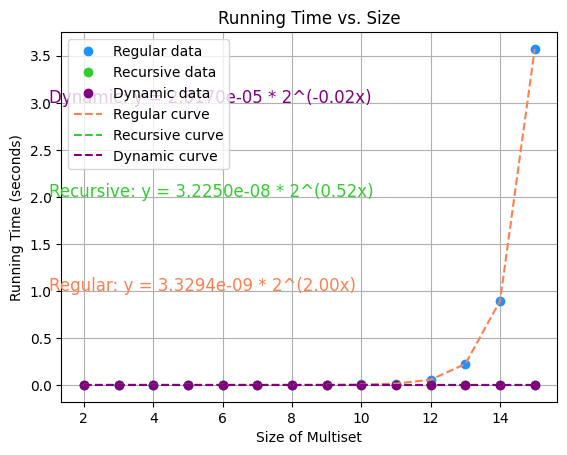

In [8]:
import time
import matplotlib.pyplot as plt
from itertools import combinations
import random
import numpy as np
from scipy.optimize import curve_fit

def generate_random_numbers(n, lower_bound=1, upper_bound=255):
    return [random.randint(lower_bound, upper_bound) for _ in range(n)]

def make_combos(my_set):
    my_set = [x for x in my_set if x != 0]

    if len(my_set) < 2:
        raise ValueError("Size of the set must be greater than 2")

    combos = []
    for i in range(2, len(my_set) +1):
        combos.extend(combinations(my_set,i))
    combos_list = [list(comb) for comb in combos]
    unique_combo_list = []

    [unique_combo_list.append(x) for x in combos_list if x not in unique_combo_list]

    return unique_combo_list

def get_sums(combos, target):
    for combo in combos:
        if sum(combo) == target:
            return True
    return False
            

def recursive_sums(set,n,target):
    
    #If we find a combination of numbers that sum up to the target
    if (target == 0):
        return True
    #if we go through all of the numbers without finding a subset
    if (n == 0):
        return False
    # if the last element is larger than the target, this can not be a subset, so remove it
    if (set[n-1] > target):
        return recursive_sums(set, n-1, target)
    #either use the last element or use try to find a subset without the last element in recursive call
    return (recursive_sums(set,n-1,target) or recursive_sums(
        set, n-1, target-set[n-1]))
def dynamic_sums(set, n, target):

    # make a table to see if the subset of set[0...j-1] equal to i, initialize it all to be false
    subset = [[False for i in range(target + 1)] for j in range(n + 1)]
    #set the first column to be all true since all subsets can be contain a subset which sums to 0
    for i in range(n + 1):
        subset[i][0] = True
    #set the first row to be false since yu can make anything from the empty set, all except for [0,0]
    for i in range(1, target + 1):
        subset[0][i] = False
    # Fill out the rest of the array, from a bottom up manner 
        
    # iterate by row
    for i in range(1, n + 1):
        #iterate through columns
        for j in range (1, target + 1):
            #if the j is less than the item in the row above
            if j < set[i-1]: #if the item is larger than the current sum
                subset[i][j] = subset[i-1][j]# set it to the value of the cell above it

            #if the target is greater than the current item
            if j >= set[i-1]:
                #either don't use the item. In this case use the value of the cell above
                #or try to find it in the table with the target minus the value of the current item.
                subset[i][j] = (subset[i-1][j] or subset[i - 1][j-set[i-1]])
    
    return subset[n][target]


reg_x = []
reg_y = []
rec_x = []
rec_y = []
dyn_x = []
dyn_y = []

for i in range(14):
    toAdd = generate_random_numbers(i+2)
    
    start_time = time.time()

    combos = make_combos(toAdd)               
    result = get_sums(combos,5)

    end_time = time.time()    



    regRunTime = end_time - start_time
    reg_x.append(i+2)
    reg_y.append(regRunTime)

    start_time = time.time()

    recursive_sums(toAdd,i+2,5)              

    end_time = time.time()
    recRunTime = end_time - start_time
    rec_x.append(i+2)
    rec_y.append(recRunTime)   
    

    start_time = time.time()
              
    result = dynamic_sums(toAdd,i+2,5)

    end_time = time.time()    

    dynRunTime = end_time - start_time
    dyn_x.append(i+2)
    dyn_y.append(dynRunTime)

reg_x_data = np.array(reg_x)
reg_y_data = np.array(reg_y)
rec_x_data = np.array(rec_x)
rec_y_data = np.array(rec_y)
dyn_x_data = np.array(dyn_x)
dyn_y_data = np.array(dyn_y)

# Define the functions to fit for each approach
def fit_function_reg(x, a, b):
    return a * 2**(b * x)

def fit_function_rec(x, a, b):
    return a * 2**(b * x)

def fit_function_dyn(x, a, b):
    return a * 2**(b * x)

# Perform the curve fitting for each approach
popt_reg, pcov_reg = curve_fit(fit_function_reg, reg_x_data, reg_y_data)
popt_rec, pcov_rec = curve_fit(fit_function_rec, rec_x_data, rec_y_data)
popt_dyn, pcov_dyn = curve_fit(fit_function_dyn, dyn_x_data, dyn_y_data)

# Plot the data and the fitted curves for each approach
plt.plot(reg_x_data, reg_y_data, "bo", label='Regular data', color='dodgerblue')
plt.plot(rec_x_data, rec_y_data, "bo", label='Recursive data', color='limegreen')
plt.plot(dyn_x_data, dyn_y_data, "bo", label='Dynamic data', color='purple')

plt.plot(reg_x_data, fit_function_reg(reg_x_data, *popt_reg), 'r-', label='Regular curve', color='coral', linestyle='--')
plt.plot(rec_x_data, fit_function_rec(rec_x_data, *popt_rec), 'r-', label='Recursive curve', color='limegreen', linestyle='--')
plt.plot(dyn_x_data, fit_function_dyn(dyn_x_data, *popt_dyn), 'r-', label='Dynamic curve', color='purple', linestyle='--')

# Annotate the plot with the equations of the fitted functions for each approach
plt.text(1, 1, f'Regular: y = {popt_reg[0]:.4e} * 2^({popt_reg[1]:.2f}x)', fontsize=12, color='coral')
plt.text(1, 2, f'Recursive: y = {popt_rec[0]:.4e} * 2^({popt_rec[1]:.2f}x)', fontsize=12, color='limegreen')
plt.text(1, 3, f'Dynamic: y = {popt_dyn[0]:.4e} * 2^({popt_dyn[1]:.2f}x)', fontsize=12, color='purple')

plt.xlabel('Size of Multiset')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. Size')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def generate_random_numbers(n):
    return [random.random() for _ in range(n)]

def make_combos(my_set):
    my_set = [x for x in my_set if x != 0]

    if len(my_set) < 2:
        raise ValueError("Size of the set must be greater than 2")

    combos = []
    for i in range(2, len(my_set) +1):
        combos.extend(combinations(my_set,i))
    combos_list = [list(comb) for comb in combos]
    unique_combo_list = []

    [unique_combo_list.append(x) for x in combos_list if x not in unique_combo_list]

    return unique_combo_list

def get_sums(combos, target):
    good_list= []
    for combo in combos:
        if sum(combo) == target:
            good_list.append(combo)
    return good_list

toAdd = [0,1,3,3,3,3,6,12,17,31,54,66]
target = 87
combos = make_combos(toAdd)               
result = get_sums(combos,target)

print(result)


[[1, 3, 17, 66], [3, 6, 12, 66], [1, 3, 12, 17, 54], [3, 3, 3, 12, 66], [1, 3, 3, 3, 6, 17, 54]]


# Number of Logic Gates

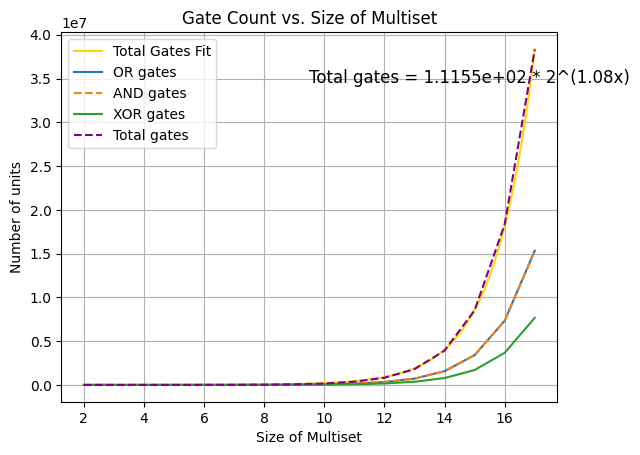

In [10]:
def count_bits(decimal_number):
    # Convert decimal number to binary
    binary_number = bin(decimal_number)

    # Remove '0b' prefix from binary representation
    binary_number = binary_number[2:]

    # Count the number of bits
    num_bits = len(binary_number)

    return num_bits

def get_num_gates(combo_list):
    oar = 0
    andy = 0
    xor = 0
    total = 0
    for combo in combo_list:
        large = max(combo)

        num_bits = count_bits(large)

        oar += (num_bits*2) * (len(combo)-1)
        andy += num_bits*2 * (len(combo)-1)
        xor += num_bits * (len(combo)-1)

        total += (num_bits*5) * (len(combo)-1)
    return(oar,andy,xor,total)

def generate_random_positive_integer(upper_bound):
    return random.randint(1, upper_bound)



#for each bit we add we need 5 gates, 2 xor, 2 and, and 1 or
x = []

oar = []
andy = []
xor = []

total = []
for i in range(16):
    toAdd = [generate_random_positive_integer(255) for _ in range(i + 2)]

    combos = make_combos(toAdd)               
    nums = get_num_gates(combos)

    x.append(i+2)

    oar.append(nums[0])
    andy.append(nums[1])
    xor.append(nums[2])
    total.append(nums[3])

x_data = np.array(x)
y_data = np.array(total)

# Define the function to fit with base 2
def fit_function_base_2(x, a, b):
    return a * np.power(2, b * x)

popt, pcov = curve_fit(fit_function_base_2, x_data, y_data)

# Create a string representation of the fitted function
fitted_function_str = f'Total gates = {popt[0]:.4e} * 2^({popt[1]:.2f}x)'
x_fit = np.linspace(min(x), max(x), 100)
y_fit = fit_function_base_2(x_fit, *popt)

plt.plot(x_fit, y_fit, label='Total Gates Fit', color='gold')

plt.text(0.5, 0.9, fitted_function_str, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


plt.plot(x, oar, label='OR gates')
plt.plot(x, andy, label='AND gates',linestyle = '--')
plt.plot(x, xor, label='XOR gates')
plt.plot(x, total, linestyle = '--',label='Total gates',color = 'purple')

plt.xlabel('Size of Multiset')
plt.ylabel('Number of units')
plt.title('Gate Count vs. Size of Multiset')
plt.legend()
plt.grid(True)
plt.show()



# Decision Finding Time